In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, FuncFormatter, NullFormatter

# --- Data (Band Gap in eV, Wavelength in µm) ---
data = [
    (0.1, 12.42),
    (0.2, 6.21),
    (0.3, 4.14),
    (0.4, 3.11),
    (0.5, 2.48),
    (0.6, 2.07),
    (0.7, 1.77),
    (0.8, 1.55),
    (0.9, 1.38),
    (1.0, 1.24),
    (1.1, 1.13),
    (1.2, 1.04),
    (1.3, 0.96),
    (1.4, 0.89),
    (1.5, 0.83),
    (1.6, 0.78),
    (1.7, 0.73),
    (1.8, 0.69),
    (1.9, 0.65),
    (2.0, 0.62),
    (2.1, 0.59),
    (2.2, 0.56),
    (2.3, 0.54),
    (2.4, 0.52),
    (2.5, 0.50),
    (2.6, 0.48),
    (2.7, 0.46),
    (2.8, 0.44),
    (2.9, 0.43),
    (3.0, 0.41),
    (3.1, 0.40),
    (3.2, 0.39),
    (3.3, 0.38),
    (3.4, 0.37),
    (3.5, 0.35),
    (3.6, 0.35),
    (3.7, 0.34),
    (3.8, 0.33),
    (3.9, 0.32),
    (4.0, 0.31),
    (4.1, 0.30),
    (4.2, 0.30),
    (4.3, 0.29),
    (4.4, 0.28),
    (4.5, 0.28),
    (4.6, 0.27),
    (4.7, 0.26),
    (4.8, 0.26),
    (4.9, 0.25),
    (5.0, 0.25),
]
df = pd.DataFrame(data, columns=["Band_Gap_eV", "Wavelength_um"])

# Sort so the line draws smoothly from high wavelength to low
df = df.sort_values("Wavelength_um", ascending=False).reset_index(drop=True)
df.head()

,Band_Gap_eV,Wavelength_um
0,0.1,12.42
1,0.2,6.21
2,0.3,4.14
3,0.4,3.11
4,0.5,2.48


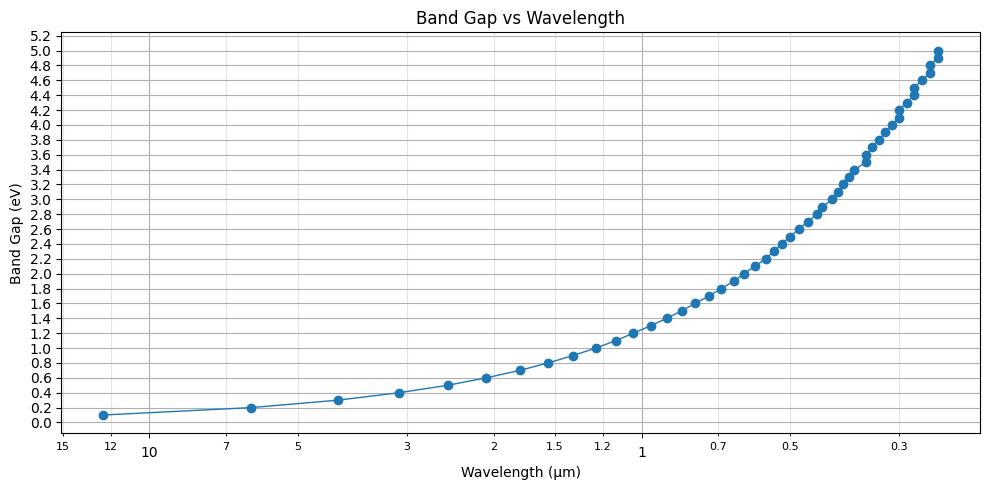

Saved: bandgap_vs_wavelength_log.png


In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["Wavelength_um"], df["Band_Gap_eV"], marker="o", linewidth=1)

ax.set_xscale("log")
ax.invert_xaxis()  # high → low

ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Band Gap (eV)")
ax.set_title("Band Gap vs Wavelength")

# Y grid every 0.1 eV
ax.yaxis.set_major_locator(MultipleLocator(0.2))

# Major ticks at 1, 10, 0.1 ...
ax.xaxis.set_major_locator(LogLocator(base=10.0))

# Minor ticks at 1.2, 1.5, 2, 3, 5, etc.
subs = [1.2, 1.5, 2, 3, 5, 7]
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=subs))

# Format all tick labels numerically (not 10^x)
def log_format(x, pos):
    if x == 0:
        return ""
    if x < 1:
        return f"{x:.2g}"
    elif x < 10:
        return f"{x:.1f}".rstrip("0").rstrip(".")
    else:
        return f"{x:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(log_format))
ax.xaxis.set_minor_formatter(FuncFormatter(log_format))

ax.tick_params(axis="x", which="major", labelsize=10, pad=6)
ax.tick_params(axis="x", which="minor", labelsize=8, pad=4)

ax.grid(True, which="major")
ax.grid(True, which="minor", alpha=0.35)

fig.tight_layout()
out_png = "bandgap_vs_wavelength_log.png"
fig.savefig(out_png, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {out_png}")
